# Készítsen animációt egy közönséges, nyújtott és hurkolt cikloisról!

*Az itt található feladat kidolgozása videó formátumban megtalálható a https://youtu.be/0RBqOPpkqnc linken.*

## Ciklois  

A ciklois egy olyan görbe (ruletta) amit egy egyenesen legördülő körhöz rögzített pont ír le a mozgása során.
- közönséges ciklois: A rögzített pont a kör kerületén helyezkedik el
- nyújtott ciklois: A rögzített pont a kör területén belül helyezkedik el
- hurkolt ciklois: A rögzített pont a kör területén kívül helyezkedik el  

Dinamikában fontos szerepet tölt be a gördülést leíró modellekben. (szemlélteti, hogy a csúszásmentes gördülés során a talajjal érintkező pontja a keréknek csak függőleges sebességkomponenssel rendelkezik!)  
Megoldása továbbá funkcionálanalízis feladatoknak (brachisztocron probléma)  
Géptervezésben is használják pl. ciklois fogazatú fogaskerék gyártására.

# Részfeladatok  
-Készítsen `function` -t egy közönséges, és egy általános ciklois paraméteres egyenletéről  
-Készítsen egy `function` -t ami egy `list`-be gyűjtve megadja egy általános ciklois koordinátáit $δt$ felbontással.  
-Rajzoljon ki egy közönséges, nyújtott és hurkolt cikloist  
-Készítsen animációt egy közönséges, nyújtott és hurkolt cikloisról

## Közönséges ciklois egyenlete

Vegyünk egy $r$ sugarú $(0,r)$ középpontú kört az $xy$ síkon. Amennyiben ez a kör $\omega$ szögsebességgel csúszásmentesen gördül az $x$ tengelyen, akkor a középpontjának paraméteres pályája:
$$ x_k = r \omega t $$
$$ y_k = r $$  
  
A kezdetben $(0,0)$ koordinátájú pont paraméteres pályája:  
$$ x = x_k - r sin(\omega t) $$ 
$$ y = y_k - r cos(\omega t) $$  
  
  
Általános ciklois egyenlete:
$$ x = r\omega t-\lambda r sin(\omega t) $$
$$ y = r-\lambda r cos(\omega t) $$

In [1]:
# 'Manuálisan' számítva:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

r = 1
λ = 1
ω = 1
t0 = 0

x = r*ω*t0-r*λ*np.sin(ω*t0)
y = r-r*λ*np.cos(ω*t0)

print(x,y)

0.0 0.0


In [2]:
# Function -nel számítva:

def pont_koordinata(r, ω, λ, t):

    x = r*ω*t-r*λ*np.sin(ω*t)
    y = r-r*λ*np.cos(ω*t)
    
    return x, y

x,y = pont_koordinata(10,ω,λ,np.pi)
print(x,y)

x,y = pont_koordinata(20,ω,λ,np.pi)
print(x,y)

31.41592653589793 20.0
62.83185307179586 40.0


## `list` objektum

- Egy osztályba tartozó objektumok rendezett sora
- Az elemeire indexekkel lehet hivatkozni
- A `list` bővíthető (nem fix méretű)
- Az elemei változtathatóak


In [3]:
# Létrehozás:

list1 = [] # Üresen is lehet
list2 = [1, 2, 3, 4]

list1.append(1)
list1.append(12)
list1.append(134)

print(list1)
print(list1[1]) # Indexelés nulláról indul

[1, 12, 134]
12


In [4]:
# Létrehozunk egy `function`-t ami t időpillanatig kiszámítja a ciklois pályáját δt felbontással

def ciklois_palya(r, ω, λ, t):
    
    δt = 0.1
    x = []
    y = []
    n = round(t/δt)
    
    for i in range(n):
        # Ebben a for loopban az i értéke változik ciklusról-ciklusra!
        xn, yn = pont_koordinata(r,ω,λ,i*δt)
        x.append(xn)
        y.append(yn)
    
    return x, y

x,y = ciklois_palya(r,ω,λ,4*np.pi)

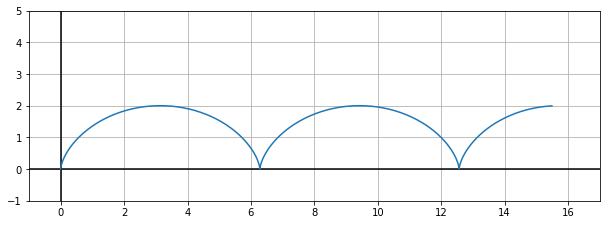

In [5]:
# %matplotlib inline

x,y = ciklois_palya(r,ω,λ,5*np.pi)

# Létrehozunk egy általános ábrát amire majd rajzolunk
# Akár több diagrammot is lehetne egy ábrára rajzolni
# A létrehozáskor extra paraméterként megadjuk az ábra méretét (inchben)
fig = plt.figure(figsize=(13,3.5))

# Az ábrán létrehozunk egy xy tengelypárt
# Megadjuk rajta az x és y tengelyek kirajzolandó tartományát
# A tengelyek léptékét egyenlőre vesszük, hogy arányos ábrát kapjunk
ax = plt.axes()
ax.set_xlim(-1,17)
ax.set_ylim(-1,5)
ax.set_aspect('equal')

# Lehet állítani rácsvonalakat
ax.grid(True)
# Ki lehet emelni a tengelyeket
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')


# A tengelypárra kiplottoljuk a kiszámított ciklois görbe pontjait
ciklois, = ax.plot(x,y)

# Megjelenítjük a kész ábrát
plt.show()

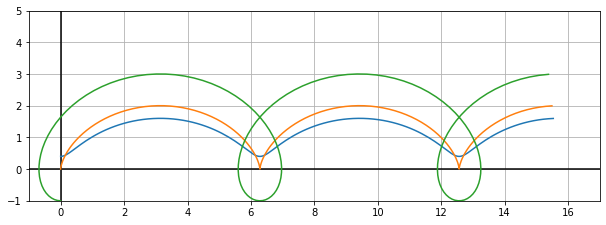

In [6]:
# %matplotlib inline

# Akár több görbét is kirajzolhatunk ugyan abba a koordináta rendszerbe

x,y = ciklois_palya(r,ω,λ,5*np.pi)

# Létrehozunk egy általános ábrát amire majd rajzolunk
# Akár több diagrammot is lehetne egy ábrára rajzolni
# A létrehozáskor extra paraméterként megadjuk az ábra méretét (inchben)
fig = plt.figure(figsize=(13,3.5))

# Az ábrán létrehozunk egy xy tengelypárt
# Megadjuk rajta az x és y tengelyek kirajzolandó tartományát
# A tengelyek léptékét egyenlőre vesszük, hogy arányos ábrát kapjunk
ax = plt.axes()
ax.set_xlim(-1,17)
ax.set_ylim(-1,5)
ax.set_aspect('equal')

# Lehet állítani rácsvonalakat
ax.grid(True)
# Ki lehet emelni a tengelyeket
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')


# A tengelypárra kiplottoljuk a kiszámított ciklois görbe pontjait
x,y = ciklois_palya(r,ω,0.6,5*np.pi)
ciklois, = ax.plot(x,y)
x,y = ciklois_palya(r,ω,1,5*np.pi)
ciklois, = ax.plot(x,y)
x,y = ciklois_palya(r,ω,2,5*np.pi)
ciklois, = ax.plot(x,y)

# Megjelenítjük a kész ábrát
plt.show()

Traceback (most recent call last):
  File "/Users/domonkoscsuzdi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/domonkoscsuzdi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


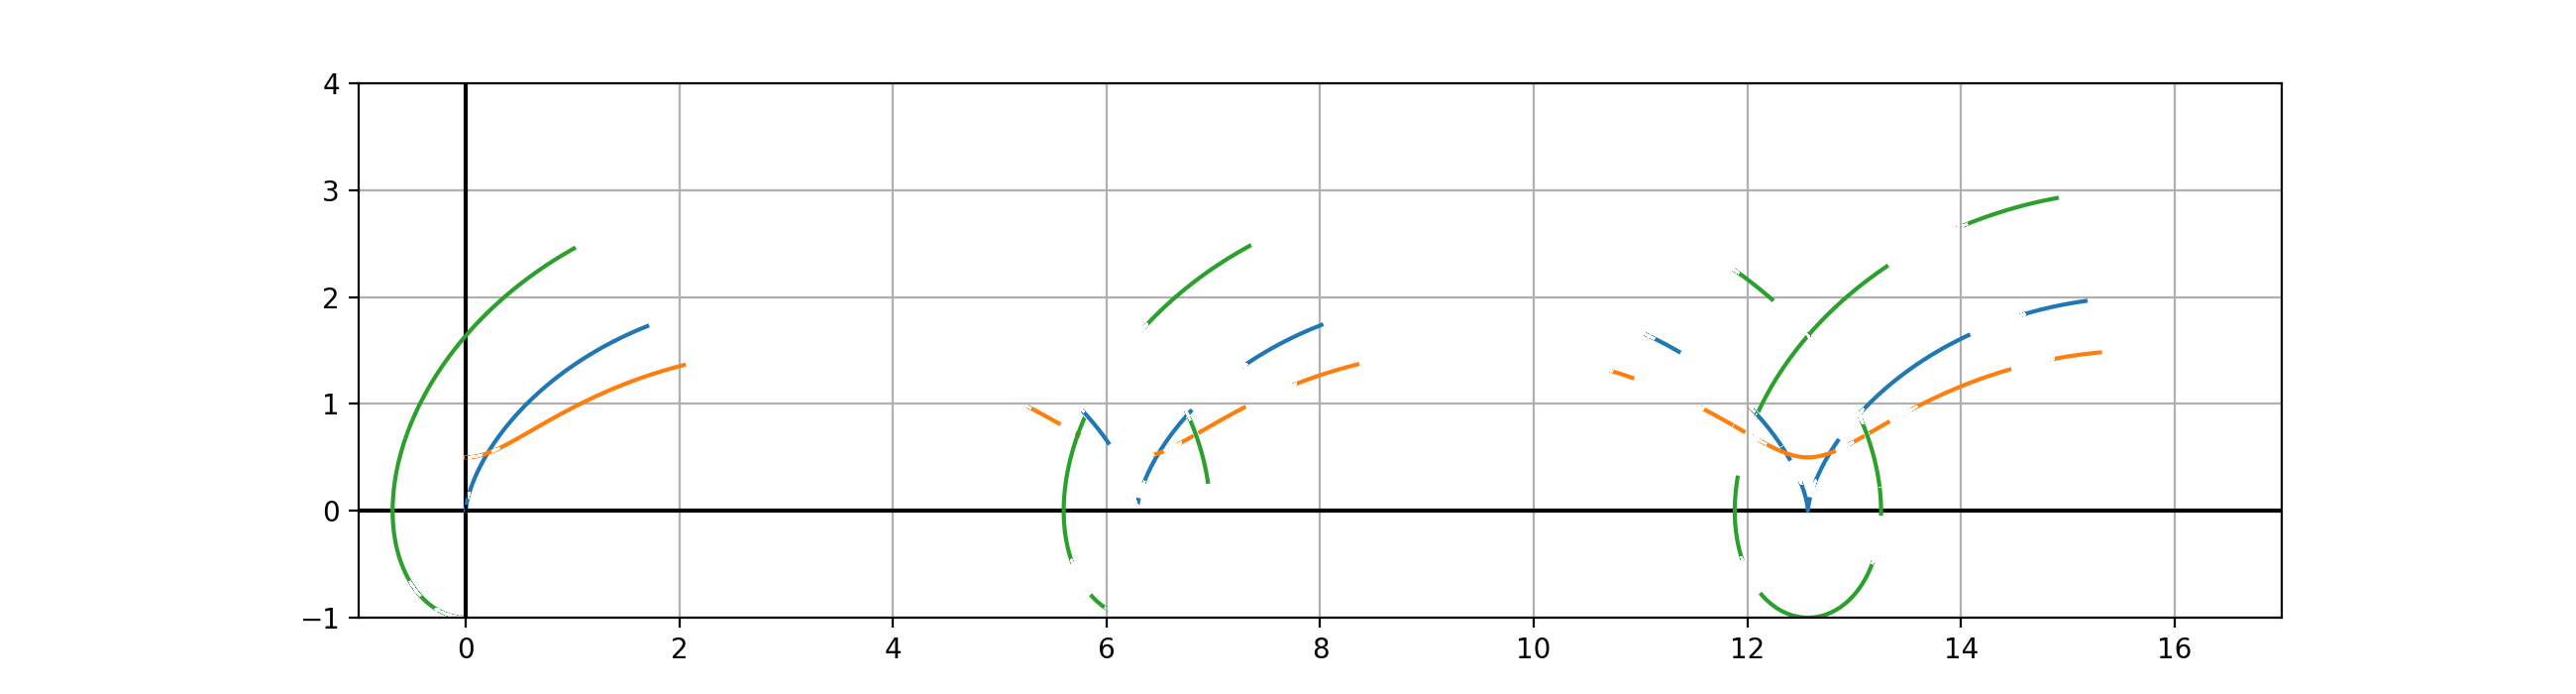

In [10]:
# Az animáláshoz létre kell hoznunk egy `functiont` ami képkockáról képkockára kirajzolja a cikloist!
# Át kell állítani a matplotlib eninge-t, hogy rendesen működjön az animáció a notebookon belül
%matplotlib nbagg

fig = plt.figure(figsize=(13,3.5))

ax = plt.axes()
ax.set_xlim(-1,17)
ax.set_ylim(-1,4)
ax.set_aspect('equal')

ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ciklois, = ax.plot([],[])
ciklois2, = ax.plot([],[])
ciklois3, = ax.plot([],[])

def animacio(t):
    # A matplotlib animáló parancsába kell majd beadjuk ezt a függvényt
    # Kötelezően egy darab változót fogadhat, amit az animátor parancs léptet majd!
    # Esetünkben ez felel meg az időnek
    
    x,y = ciklois_palya(r,0.15,λ,t)
    ciklois.set_data(x,y)
    x,y = ciklois_palya(r,0.15,0.5,t)
    ciklois2.set_data(x,y)
    x,y = ciklois_palya(r,0.15,2,t)
    ciklois3.set_data(x,y)
    
    return ciklois, ciklois2, ciklois3

ani = animation.FuncAnimation(fig, animacio, frames=150, interval=100)
# Megjelenítjük a kész ábrát
plt.show()
# FONTOS: az animáció csak a '.ipynb' kiterjesztésű fájl megnyitása esetén tekinthető meg.

In [8]:
# Tegyük még rá a generáló kört is az animációra!

def kor_palya(r, ω, t):
    
    x = []
    y = []
    
    for i in range(100):
        # Ebben a for loopban az i értéke változik ciklusról-ciklusra!
        xn = ω*t*r + np.cos(i*2*np.pi/100)*r
        yn = r + np.sin(i*2*np.pi/100)*r
        x.append(xn)
        y.append(yn)
    
    return x, y

Traceback (most recent call last):
  File "/Users/domonkoscsuzdi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/domonkoscsuzdi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


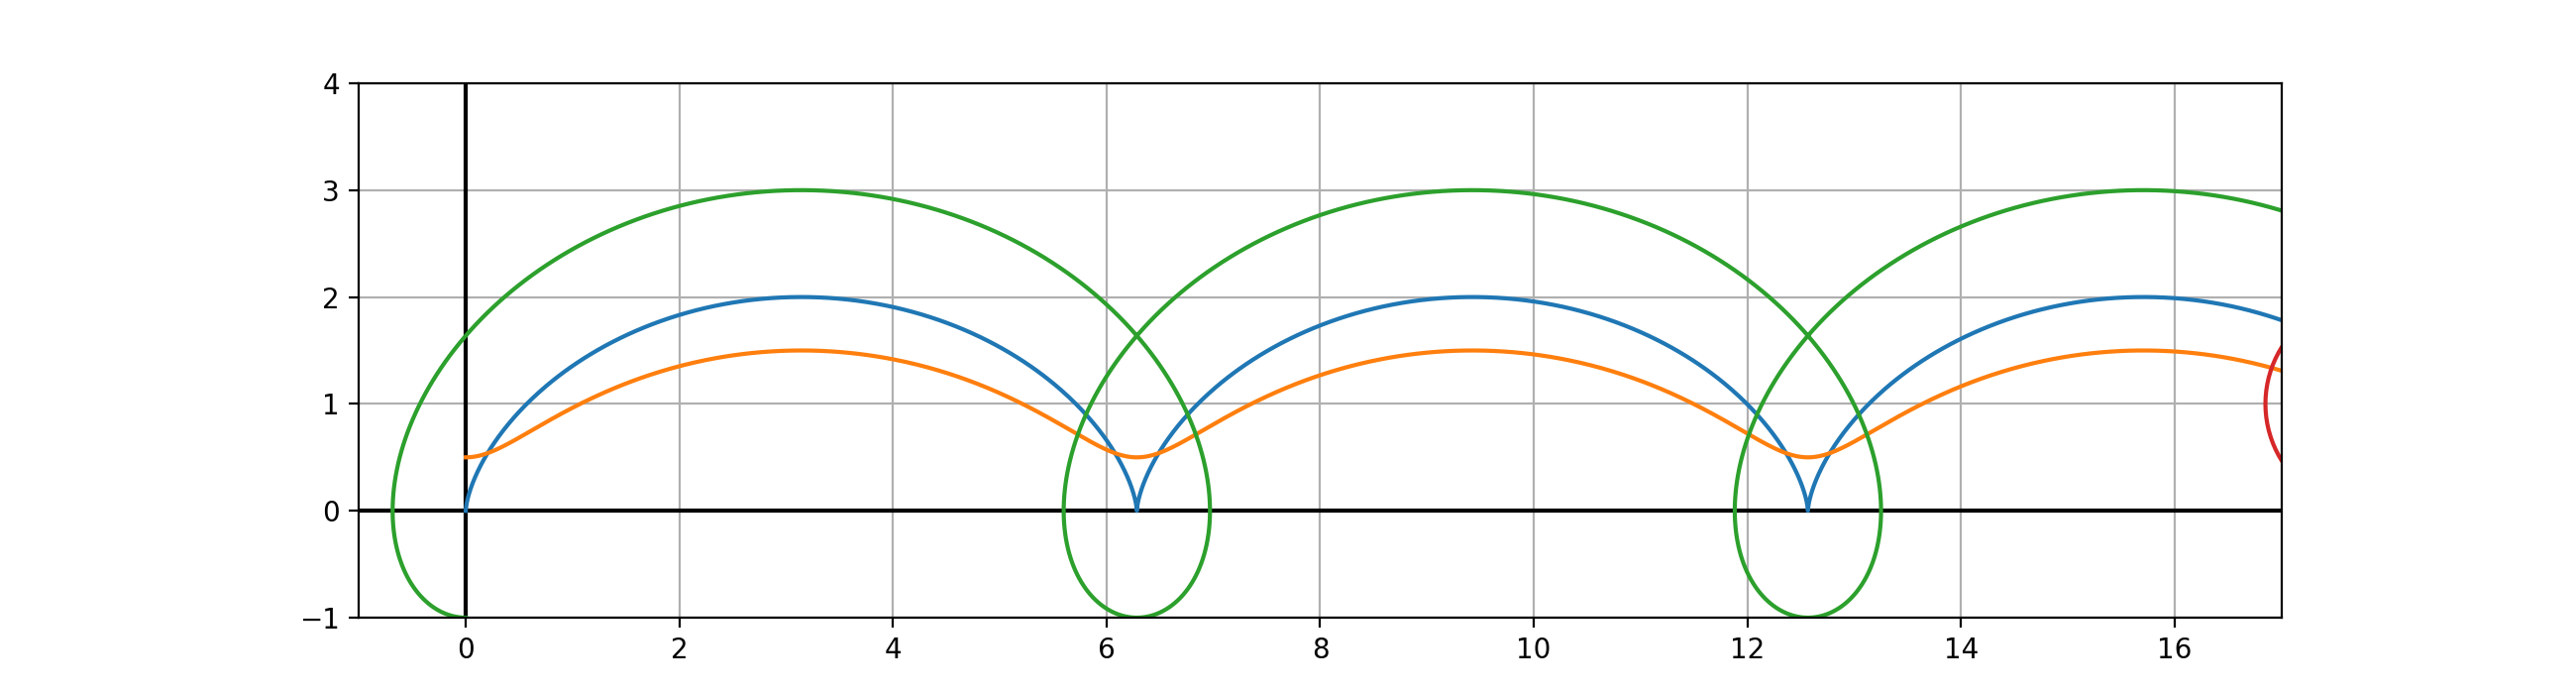

In [9]:
# Az animáláshoz létre kell hoznunk egy `functiont` ami képkockáról képkockára kirajzolja a cikloist!
# Át kell állítani a matplotlib eninge-t, hogy rendesen működjön az animáció a notebookon belül
%matplotlib nbagg

fig = plt.figure(figsize=(13,3.5))

ax = plt.axes()
ax.set_xlim(-1,17)
ax.set_ylim(-1,4)
ax.set_aspect('equal')

ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ciklois, = ax.plot([],[])
ciklois2, = ax.plot([],[])
ciklois3, = ax.plot([],[])
kor, = ax.plot([],[])

def animacio2(t):
    # A matplotlib animáló parancsába kell majd beadjuk ezt a függvényt
    # Kötelezően egy darab változót fogadhat, amit az animátor parancs léptet majd!
    # Esetünkben ez felel meg az időnek
    
    x,y = ciklois_palya(r,0.15,λ,t)
    ciklois.set_data(x,y)
    x,y = ciklois_palya(r,0.15,0.5,t)
    ciklois2.set_data(x,y)
    x,y = ciklois_palya(r,0.15,2,t)
    ciklois3.set_data(x,y)
    x,y = kor_palya(r,0.15,t)
    kor.set_data(x,y)
    
    return ciklois, ciklois2, ciklois3, kor

ani = animation.FuncAnimation(fig, animacio2, frames=150, interval=100)
# Megjelenítjük a kész ábrát
plt.show()
# FONTOS: az animáció csak a '.ipynb' kiterjesztésű fájl megnyitása esetén tekinthető meg.

Készítette: Tóth Gergely (BME GPK Alkalmazott Mechanika Szakosztály)

Észrevételek: amsz.bme@gmail.com